<img src='iris_01.png' align="center"  width="1000">

# 0. Intro

The [Iris flower data set](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems* as an example of linear discriminant analysis. It is perhaps the best known database to be found in the pattern recognition literature, and Fisher's paper is a classic in the field that is referenced frequently to this day. 

The dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

<img src='iris_02.png' align="center" width="500">

This analysis was submitted as an assignment in the [Data Science course at Digital House Coding School](https://www.digitalhouse.com/br/curso/data-science) in São Paulo, Brazil.

### 0.1. The Task

The Iris data set is one of the most famous multivariate data sets used for testing various Machine Learning algorithms, and it can be used for classification as well as clustering. 

For this assignment I used the Iris data set to train three different clustering algorithms and compare their results: K-Means, DBSCAN and HCA. The comparison will only be made visually, as my interest is more in the implementation of the algorithms than their performance in this data set.

# 1. Importing Libraries & Data

In [2]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

The Iris data set is a part of sklearn library, which comes pre-loaded with data sets to practice ML techniques. A version of Iris can also be downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris) although this  version has two wrong data points, in the 35th and 38th samples.

In [3]:
# Load dataset & view details
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

As can be seen above, this dataset requires some manipulation so it becomes easier to read and interpret:

In [4]:
# Create dataframe with dataset information (data, feature_names, target, target_names) & print head
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class label'] = iris.target
df['class label'] = df['class label'].replace([0, 1, 2], iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1.2. Data Exploration

I start by plotting the original dataset in order to have a visual benchmark of the different classes, which is helpful for understanding the data better and will also make it easier to evaluate the performance of the models.

For this I select the first two features of the data, sepal length and width.

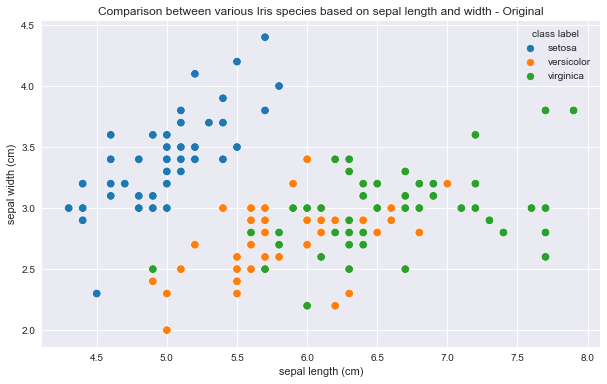

In [5]:
# Plot original dataset 
plt.figure(figsize=(10, 6))
plt.title('Comparison between various Iris species based on sepal length and width - Original', size=12)
sns.scatterplot(df['sepal length (cm)'],
                df['sepal width (cm)'], 
                hue=df['class label'],
                s=75,
                palette='tab10');

As stated in the dataset description, one class (setosa) is linearly separable from the other 2, whereas the latter are NOT linearly separable from each other (versicolor and virginica).

Setosa species seem to have a smaller sepal length but larger sepal width compared to the other two species, of which versicolor seems to have smaller size than virginica for both measurements althouth there is significant overlap between them.

In [6]:
# Check mean & median for each species
df[['sepal length (cm)', 'sepal width (cm)', 'class label']].groupby('class label').agg(['mean', 'median'])

sepal length (cm)        sepal width (cm)       
                         mean median             mean median
class label                                                 
setosa                  5.006    5.0            3.428    3.4
versicolor              5.936    5.9            2.770    2.8
virginica               6.588    6.5            2.974    3.0

A brief statistical analysis of the sepal length and width measurements for the three species confirms the findings from the visual inspection.

### 2.2. Data Prep

In [7]:
# Split X & y
X = df.drop('class label', axis=1)
y = df['class label']

A scaler is applied in order to standardize the features of the dataset and guarantee that each variable contributes equally to the model:

In [8]:
# Define scaler
scaler = MinMaxScaler()

# Fit data to scaler & transform
Xs = scaler.fit_transform(X)

# 2. Clustering Algorithms

### 2.1. K-Means

The K-means algorithm identifies a target number K, which refers to the number of centroids (imaginary or real locations representing the center of the cluster), and then allocates every data point to the nearest cluster. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

The first step is implementing the “elbow” method to select the optimal number of K, by fitting the model with a range of values between 2 and 10.

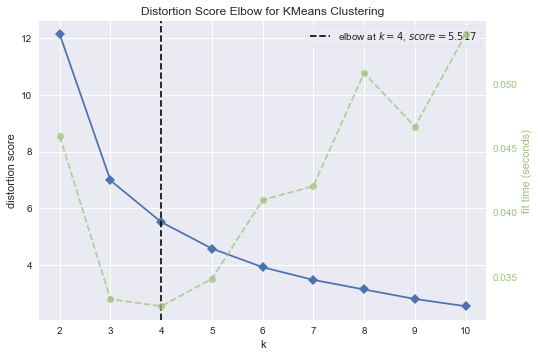

In [9]:
# Define KMeans algo and KElbowVisualizer with a range of 2-10 clusters; fit data (scaled); show plot
km = KMeans()
visualizer_kmeans = KElbowVisualizer(km, k=(2,11))
visualizer_kmeans.fit(Xs)
visualizer_kmeans.show();

Elbow visualization suggests the use of 4 clusters, which clashes against our knowledge of the dataset. These results can be compared to those of the Silhouette method, which is another way of calculating the goodness of a clustering technique. 

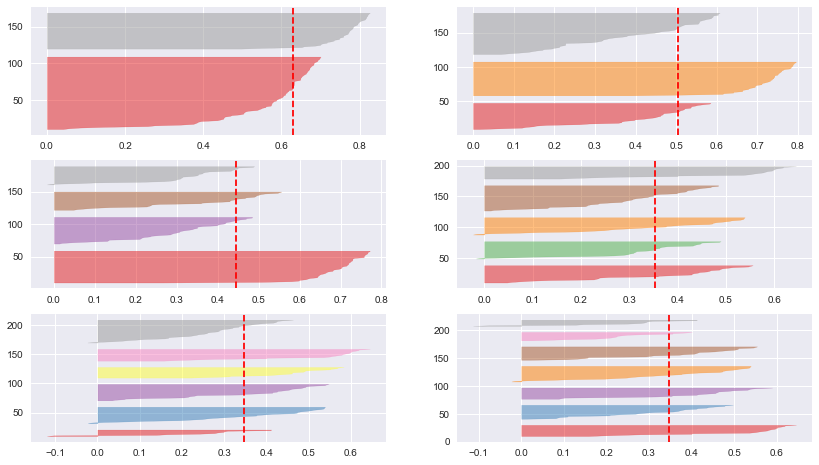

In [10]:
# Iterate through range to calculate silhouette scores with different numbers of clusters (2-7)
# Define KMeans algo and SilhouetteVisualizer; fit data (scaled) and show plot
fig, ax = plt.subplots(3, 2, figsize=(14,8))
for i in range(2, 8):
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2) # only used to define location of each graph
    visualizer_silhouette = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer_silhouette.fit(Xs)

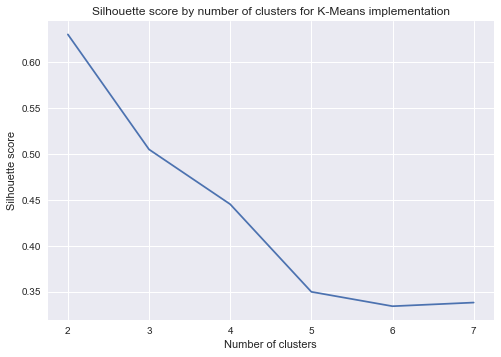

In [11]:
# Iterate through range to calculate silhouette scores with different numbers of clusters (2-7)
# Append to a list the silhouette score for each model to plot results
silhouette_scores = []
n_cluster_list = range(2, 8)
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(Xs)
    silhouette_scores.append(silhouette_score(Xs, kmeans.labels_))
    
# Plot results
plt.plot(n_cluster_list, silhouette_scores)
plt.title('Silhouette score by number of clusters for K-Means implementation', size=12)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

The Silhouette Score suggests using 3 clusters, as this option has a higher silhouette score (0.50) compared to 4 clusters (0.45) and doesn't have a negative silhouette score for any element.

Since there is no real performance goal for this assignment, I will train the K-Means model using both 3 and 4 clusters, in both cases without performing any optimization of hyperparameters.

#### 2.2.1. K-Means using 4 clusters

In [12]:
# Define KMeans model using 4 clusters & fit data
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(Xs)

# Result
labels_1 = kmeans4.predict(Xs)
labels_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 3, 2,
       2, 3, 2, 3, 3, 2, 3, 2, 2, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

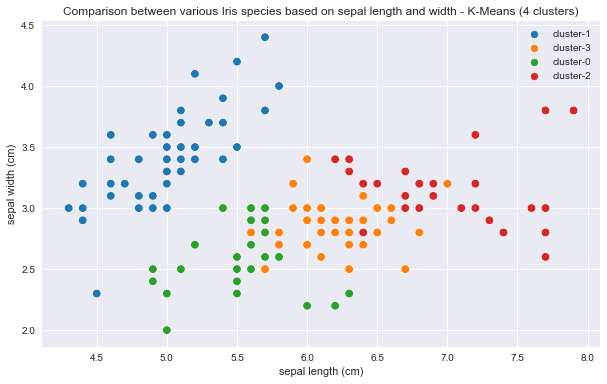

In [13]:
# Plot results
plt.figure(figsize=(10, 6))
plt.title('Comparison between various Iris species based on sepal length and width - K-Means (4 clusters)', size=12)
sns.scatterplot(df['sepal length (cm)'],
                df['sepal width (cm)'], 
                hue=[f'cluster-{x}' for x in labels_1],
                s=75,
                palette='tab10');

In [14]:
# Count samples in each cluster
for elem in np.unique(labels_1):
    print(f'cluster-{elem} has {sum(labels_1==elem)} elements')

cluster-0 has 29 elements
cluster-1 has 50 elements
cluster-2 has 29 elements
cluster-3 has 42 elements


The K-Means model using 4 clusters correctly identified all 50 samples of the setosa species as cluster-1. The remaining 100 samples of species verticolor and virginica were divided into three different clusters that have either 29 or 42 samples each.

#### 2.2.2. K-Means using 3 clusters

In [15]:
# Define KMeans model using 3 clusters & fit data
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(Xs)

# Result
labels_2 = kmeans3.predict(Xs)
labels_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

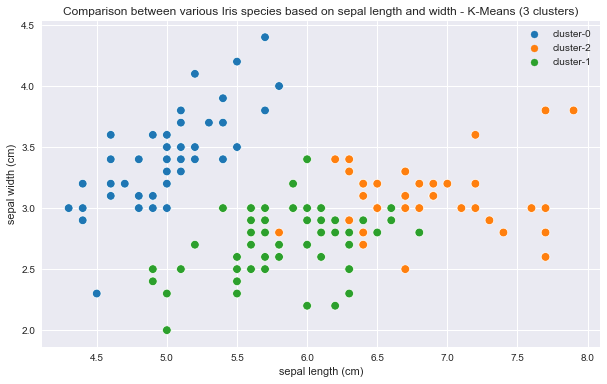

In [16]:
# Plot results
plt.figure(figsize=(10, 6))
plt.title('Comparison between various Iris species based on sepal length and width - K-Means (3 clusters)', size=12)
sns.scatterplot(df['sepal length (cm)'],
                df['sepal width (cm)'], 
                hue=[f'cluster-{x}' for x in labels_2],
                s=75,
                palette='tab10');

In [17]:
# Count samples in each cluster
for elem in np.unique(labels_2):
    print(f'cluster-{elem} has {sum(labels_2==elem)} elements')

cluster-0 has 50 elements
cluster-1 has 61 elements
cluster-2 has 39 elements


In [18]:
# Determine intersection of clusters from model with original dataset clusters
coincidence = labels_2 + iris.target
coincidence

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4,
       4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [20]:
# Print intersections
for elem in np.unique(coincidence):
    if elem!=3:
        print(f'{sum(coincidence==elem)} elements add up to {elem} and are clustered adequately')       
    else:
        print(f'{sum(coincidence==elem)} elements add up to {elem} and are NOT clustered adequately')

50 elements add up to 0 and are clustered adequately
47 elements add up to 2 and are clustered adequately
17 elements add up to 3 and are NOT clustered adequately
36 elements add up to 4 and are clustered adequately


Again, the K-Means model correctly identified all 50 samples of the setosa species as cluster-0. The remaining 100 samples were divided between two different clusters: 
* cluster-1 has 61 elements, of which 47 belong to the versicolor species and 14 to the virginica species
* cluster-2 has 39 elements, of which 36 belong to the virginica species and 3 to the versicolor species 

### 2.2. DBSCAN

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster, and so it is able to find core samples of high density and expands clusters from them, including arbitrary shaped clusters and clusters with noise (i.e. outliers). 

There are two parameters to the algorithm, `min_samples` and `eps`; the first primarily controls how tolerant the algorithm is towards noise and will be set to 4, whereas the latter is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value, so I will create a nearest neighbor distances plot to determine the optimal value for `eps`.

In [21]:
# Define NearestNeighbors model and fit data
# Nearest neighbor to a datapoint is always the datapoint itself, so 4 = datapoint + 3 neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=4)
nearest_neighbors.fit(Xs)

NearestNeighbors(n_neighbors=4)

In [22]:
# Create array with results from model, with each point and the distance to its 3 nearest-neighbors
distances, indices = nearest_neighbors.kneighbors(Xs)

# Select only farthest nearest-neighbor (column 3) for each datapoint, sort results in increasing order
distances_sorted = np.sort(distances[:, 3], axis=0)
distances_sorted

array([0.04498205, 0.04498205, 0.04498205, 0.04498205, 0.0500771 ,
       0.0500771 , 0.0500771 , 0.05084746, 0.05286766, 0.05286766,
       0.05286766, 0.05286766, 0.05371412, 0.0580835 , 0.05892557,
       0.06047157, 0.06131473, 0.06131473, 0.06731345, 0.06731345,
       0.06779661, 0.06798027, 0.07136652, 0.07136652, 0.07343652,
       0.0772763 , 0.0772763 , 0.07783114, 0.07957695, 0.08098544,
       0.08263953, 0.08263953, 0.08263953, 0.08263953, 0.08263953,
       0.08274005, 0.08274005, 0.08333333, 0.0842858 , 0.0842858 ,
       0.08606971, 0.08779372, 0.08779372, 0.08784105, 0.08784105,
       0.08946129, 0.0898254 , 0.0898254 , 0.0941549 , 0.0941549 ,
       0.09469862, 0.09469862, 0.09469862, 0.09469862, 0.09762125,
       0.09762125, 0.09762125, 0.09762125, 0.09868857, 0.09868857,
       0.09868857, 0.09868857, 0.09914459, 0.1001542 , 0.10133244,
       0.10149637, 0.10149637, 0.10157824, 0.10157824, 0.10206207,
       0.1029624 , 0.1029624 , 0.1029624 , 0.1029624 , 0.10345

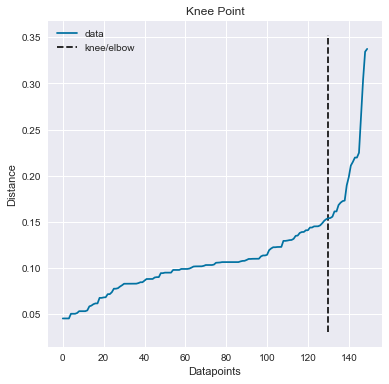

The optimal value for EPS in this data set is 0.1537150713320613


In [23]:
# Define KneeLocator model and iterate over all elements of 'distances_sorted'
i = np.arange(len(distances_sorted))
knee = KneeLocator(i, 
                   distances_sorted, 
                   S=1, 
                   curve='convex', 
                   direction='increasing', 
                   interp_method='polynomial')

# Plot results of KneeLocator
knee.plot_knee()
plt.xlabel('Datapoints')
plt.ylabel('Distance')
plt.show()

print(f'The optimal value for EPS in this data set is {distances_sorted[knee.knee]}')

In [24]:
# Define DBSCAN model; fit data; predict labels (clusters) for each group
db = DBSCAN(eps=0.1537, min_samples=4)
db.fit(Xs)

# Results
labels_3 = db.labels_
labels_3

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

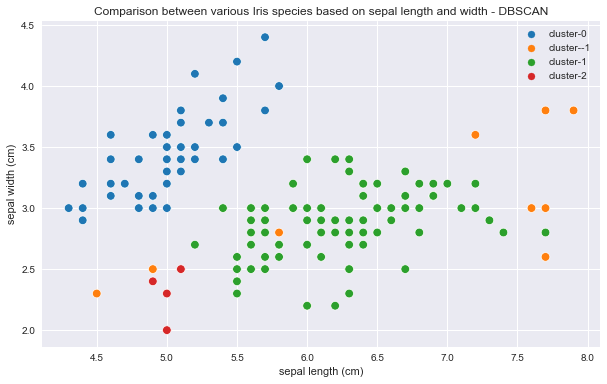

In [25]:
# Plot result
plt.figure(figsize=(10, 6))
plt.title('Comparison between various Iris species based on sepal length and width - DBSCAN', size=12)
sns.scatterplot(df['sepal length (cm)'],
                df['sepal width (cm)'], 
                hue=[f'cluster-{x}' for x in labels_3],
                s=75,
                palette='tab10');

In [26]:
# Count samples in each cluster
for elem in np.unique(labels_3):
    print(f'cluster-{elem} has {sum(labels_3==elem)} elements')

cluster--1 has 10 elements
cluster-0 has 49 elements
cluster-1 has 87 elements
cluster-2 has 4 elements


The DBSCAN model correctly identified all but one of the setosa species' samples as cluster-0. Of the remaining 101 samples, most were assigned to cluster-1 which has 87 samples, whereas the rest were split between two small clusters of four and ten samples each.

### 2.3. HCA

Hierarchical Cluster Analysis (HCA) is an algorithm that uses a “bottom-up” approach where each observation starts in its own cluster, and pairs of clusters are merged according to their proximity as one moves up the hierarchy. HCA is usually represented using a dendrogram, which is a type of tree diagram showing hierarchical relationships in which the distance between data points represents dissimilarities, and the height of the branches represents the distance between clusters. 

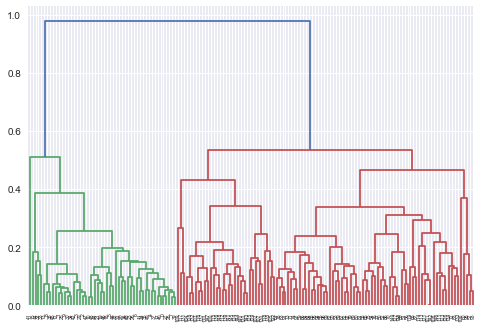

In [27]:
# Define dendrogram visualization & linkage method to be used
dendrogram = sch.dendrogram(sch.linkage(Xs, method='average'))

The above dendrogram suggests using 2 clusters for this dataset.

In [28]:
# Define clustering model (using n_clusters suggested by dendrogram) & fit data
hca = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
hca.fit(Xs)

# Result
labels_4 = hca.labels_
labels_4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

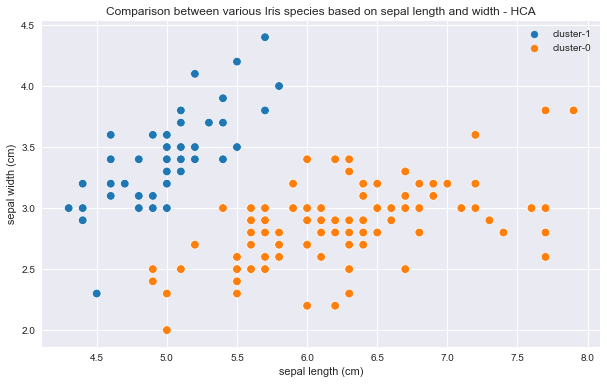

In [29]:
# Plot result
plt.figure(figsize=(10, 6))
plt.title('Comparison between various Iris species based on sepal length and width - HCA', size=12)
sns.scatterplot(df['sepal length (cm)'],
                df['sepal width (cm)'], 
                hue=[f'cluster-{x}' for x in labels_4],
                s=75,
                palette='tab10');

In [30]:
# Count samples in each cluster
for elem in np.unique(labels_4):
    print(f'cluster-{elem} has {sum(labels_4==elem)} elements')

cluster-0 has 100 elements
cluster-1 has 50 elements


The HCA model correctly identified all 50 samples of the setosa species as cluster-1. However, the model was unable to properly differentiate between the verticolor and virginica species and thus it lumped the remaining 100 samples into one large cluster.